# Predictability in metals speads and interest rates
Recent person on podcast mentioned how the metals markets predicts interest rates in particular the spreaed between copper (base) and gold (precious).  However, results show below that statistically it hasn't been significant (I've also tried monthly, weekly, and quarterly look aheads).  Metals data comes from the futures time series and the yields are the US 10 Year constant maturity yields from the Federal Reserve data.

In [15]:
%matplotlib inline
import pylab
import pandas as pd
import quandl
import seaborn as sns
import statsmodels.api as sm

# These are my notes

$$ r_t = \alpha + \beta Spread + \varepsilon $$

# These are my notes

$$ r_t = \alpha + \beta Spread + \varepsilon $$

* This is number one
* this is number two


# Getting Quandl data for US Treasury yields

In [27]:
yields=quandl.get("USTREASURY/YIELD", authtoken=token)

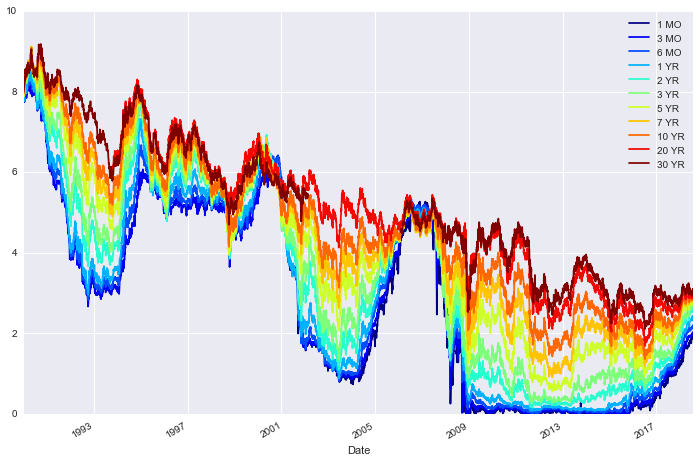

In [79]:
yields.plot(colormap='jet')

In [28]:
quandl.get("USTREASURY/YIELD", authtoken=token).head()

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
1990-01-02,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


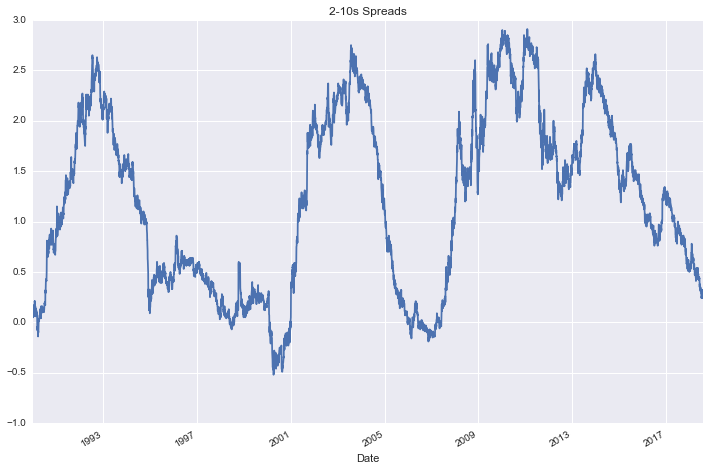

In [74]:
(yields['10 YR']-yields['2 YR']).plot(title='2-10s Spreads')

# Yield Copper Gold spread analysis

In [16]:
token="Us3wFmXGgAj_1cUtHAAR"
import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

In [18]:
df=pd.DataFrame()
df['Yield']=quandl.get("FRED/DGS10", authtoken=token).Value
df['Copper']=quandl.get("CHRIS/CME_HG1", authtoken=token).Settle
df['Gold']=quandl.get("CHRIS/CME_GC1", authtoken=token).Settle

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


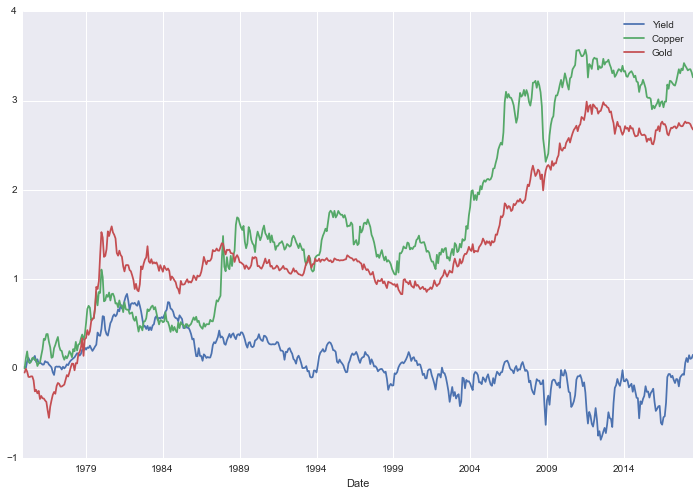

In [51]:
df.dropna().resample(rule='m',how='last').pct_change().cumsum().plot()

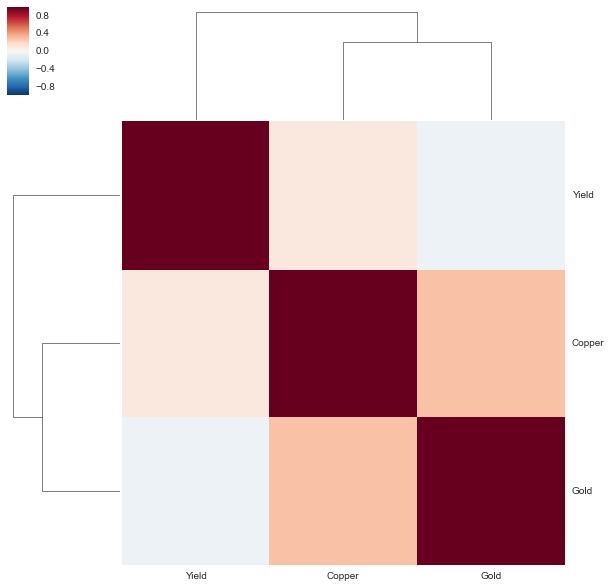

In [76]:
sns.clustermap(df.pct_change().corr())

# Regression analysis

Testing if the previous month's spread between the gold and copper return is predective of the next month's yeild move

$$ Y = \alpha + \beta X_{t-1} + \varepsilon $$

Where $Y$ is the vector of percent moves of the US 10 year yield and $X_{t-1}$ is the difference between return of copper and gold from the previous month.

In [77]:
df2=df.dropna().resample(rule='m',how='last').pct_change().dropna()
df2['Change']=df2.Copper-df2.Gold

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


In [78]:
Y=df2.Yield
X = pd.DataFrame()
X['Difference between Gold and Copper']=df2.Change.shift(1).dropna()
X['Alpha']=1
r= sm.OLS(Y[X.index].dropna(),X).fit()
print r.summary()

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.141
Date:                Wed, 01 Aug 2018   Prob (F-statistic):              0.144
Time:                        07:29:41   Log-Likelihood:                 694.72
No. Observations:                 522   AIC:                            -1385.
Df Residuals:                     520   BIC:                            -1377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Diff